# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import scipy.interpolate as spi

In [3]:
data=pd.read_csv('./PSA_dataset2.csv',encoding='utf-8')
data.loc[data["event"]=='Y',"event"]=1
data.loc[data["event"]!=1,"event"]=0
data.loc[:,"index"]=data.index

data

,NO,Age,event,height,weight,size,GS,primary,secondary,P_day1,...,PSA14,PSA15,PSA16,PSA17,PSA18,PSA19,PSA20,PSA21,PSA22,index
0,1,74.0,1,NaN,NaN,60,8.0,4.0,4.0,2002-07-27,...,21.09,23.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,71.0,1,NaN,NaN,NaN,7.0,3.0,4.0,2005-10-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,63.0,1,NaN,NaN,NaN,8.0,4.0,4.0,2008-06-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,80.0,1,NaN,NaN,NaN,7.0,4.0,3.0,2002-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,83.0,1,NaN,NaN,NaN,9.0,5.0,4.0,2000-03-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,126,70.0,0,168.0,82.0,NaN,NaN,NaN,NaN,2008-10-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1838
1839,127,70.0,0,169.0,63.0,NaN,NaN,NaN,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1839
1840,128,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-17,...,12.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1840
1841,129,69.0,0,168.0,88.0,NaN,NaN,NaN,NaN,2008-04-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1841


In [4]:
#날짜가 한바퀴 더 붙어있는 자료들
data.loc[1723,"P_day4":"P_day22"]=np.nan
data.loc[1723,"PSA4":"PSA22"]=np.nan
data.loc[1746,"P_day8":"P_day22"]=np.nan
data.loc[1746,"PSA8":"PSA22"]=np.nan
data.loc[1773,"P_day6":"P_day22"]=np.nan
data.loc[1773,"PSA6":"PSA22"]=np.nan
data.loc[1776,"P_day6":"P_day22"]=np.nan
data.loc[1776,"PSA6":"PSA22"]=np.nan
data.loc[1778,"P_day15"]=np.nan
data.loc[1778,"PSA15"]=np.nan
data.loc[1793,"P_day6":"P_day22"]=np.nan
data.loc[1793,"PSA6":"PSA22"]=np.nan
data.loc[1808,"P_day12":"P_day22"]=np.nan
data.loc[1808,"PSA12":"PSA22"]=np.nan
data.loc[1827,"P_day5":"P_day22"]=np.nan
data.loc[1827,"PSA5":"PSA22"]=np.nan
data.loc[1831,"P_day10":"P_day22"]=np.nan
data.loc[1831,"PSA10":"PSA22"]=np.nan
data.loc[1834,"P_day8":"P_day22"]=np.nan
data.loc[1834,"PSA8":"PSA22"]=np.nan
data.loc[1501,"PSA12":"PSA15"]=np.nan
data.loc[1501,"P_day13":"P_day15"]=np.nan

data.loc[1733,"Age"]=69 #mean값
data.drop(index=1607) #age=8인 오류값

,NO,Age,event,height,weight,size,GS,primary,secondary,P_day1,...,PSA14,PSA15,PSA16,PSA17,PSA18,PSA19,PSA20,PSA21,PSA22,index
0,1,74.0,1,NaN,NaN,60,8.0,4.0,4.0,2002-07-27,...,21.09,23.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,71.0,1,NaN,NaN,NaN,7.0,3.0,4.0,2005-10-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,63.0,1,NaN,NaN,NaN,8.0,4.0,4.0,2008-06-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,80.0,1,NaN,NaN,NaN,7.0,4.0,3.0,2002-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,83.0,1,NaN,NaN,NaN,9.0,5.0,4.0,2000-03-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,126,70.0,0,168.0,82.0,NaN,NaN,NaN,NaN,2008-10-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1838
1839,127,70.0,0,169.0,63.0,NaN,NaN,NaN,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1839
1840,128,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-17,...,12.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1840
1841,129,69.0,0,168.0,88.0,NaN,NaN,NaN,NaN,2008-04-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1841


In [5]:
#interval 만들기

from datetime import timedelta

for i in range(0,1843):
    n=22
    while data.loc[i,"P_day{0}".format(n)]!=data.loc[i,"P_day{0}".format(n)]:
        n-=1
    data.loc[i,"final_num"]=n
    data.loc[i,"P_day_final"]=data.loc[i,"P_day{0}".format(n)]
    
for i in range(1,23):
    data["P_dt{0}".format(i)]=pd.to_datetime(data["P_day{0}".format(i)],format='%Y-%m-%d', errors='coerce')

data["P_dt_final"]=pd.to_datetime(data["P_day_final"],format='%Y-%m-%d', errors='coerce')
data["Bx_dt"]=data["P_dt_final"]

for n in range(1,23):
    data["interval{0}".format(n)]=data["Bx_dt"]-data["P_dt{0}".format(n)]
                           
for i in range(0,1843):
    for n in range(1,23):
        data.loc[i,"interval{0}".format(n)]=data.loc[i,"interval{0}".format(n)].days

In [6]:
#날짜 순서 바뀌어 들어온 것들
data.loc[1718,"interval6"]=849
data.loc[1718,"interval5"]=866
data.loc[1719,"interval3"]=159
data.loc[1719,"interval2"]=802
data.loc[1719,"interval1"]=935

In [7]:
data.isnull().sum()

NO               0
Age              0
event            0
height        1446
weight        1446
              ... 
interval18    1821
interval19    1828
interval20    1831
interval21    1835
interval22    1836
Length: 102, dtype: int64

In [8]:
p_day=data.loc[:,"interval1":"interval22"]
psa=data.loc[:,"PSA1":"PSA22"]

p_day
psa

,PSA1,PSA2,PSA3,PSA4,PSA5,PSA6,PSA7,PSA8,PSA9,PSA10,...,PSA13,PSA14,PSA15,PSA16,PSA17,PSA18,PSA19,PSA20,PSA21,PSA22
0,4.00,3,3.8,5.3,4.7,6.19,5.81,5.73,6.62,6.23,...,6.07,21.09,23.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.66,9.84,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.15,4.13,5.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.40,3.2,1.93,2.44,2.73,2.42,2.73,4.51,4.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.17,1.78,16.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,4.79,7.79,8.61,7.65,9.53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1839,6.23,14.01,8.72,12.72,4.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1840,8.97,8.76,9.15,10.29,12.73,10.4,11.73,11.95,11.10,9.26,...,11.31,12.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1841,1.79,1.82,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#psa값 중 몇개가 >100, >5000 이런식으로 나와있다. 일단 >기호랑 ,기호 제거
#TypeError: 'Series' objects are mutable, thus they cannot be hashed --> row값은 계속 바뀌어서(x hashable) key값으로 쓸 수 없다?
for i in range(0,1843):
    for n in range(0,22):
        if type(psa.iloc[i,n])==str:
            psa.iloc[i,n]=psa.iloc[i,n].replace('>','')
            psa.iloc[i,n]=psa.iloc[i,n].replace('<','')
            psa.iloc[i,n]=psa.iloc[i,n].replace('-','.')

In [10]:
#숫자형으로 변환
psa[["PSA1","PSA2","PSA3","PSA4","PSA5","PSA6","PSA7",'PSA8']]=psa[["PSA1","PSA2","PSA3","PSA4","PSA5","PSA6","PSA7",'PSA8']].apply(pd.to_numeric)

data.loc[:,"PSA1":"PSA22"]=psa

In [11]:
drop_idx=[]
for i in data.index:
    idx=int(data.loc[i,"final_num"])-1
    if psa.iloc[i,idx]>20:
        drop_idx.append(i)

data_drop=data.drop(index=drop_idx)
data_drop.index=range(0,1726)
data_drop.loc[:,"PSA1":"PSA22"]

,PSA1,PSA2,PSA3,PSA4,PSA5,PSA6,PSA7,PSA8,PSA9,PSA10,...,PSA13,PSA14,PSA15,PSA16,PSA17,PSA18,PSA19,PSA20,PSA21,PSA22
0,7.66,9.84,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.15,4.13,5.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.40,3.20,1.93,2.44,2.73,2.42,2.73,4.51,4.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.17,1.78,16.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.10,1.13,1.59,1.22,4.28,3.99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,14.55,11.37,8.31,5.53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722,4.79,7.79,8.61,7.65,9.53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1723,6.23,14.01,8.72,12.72,4.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1724,8.97,8.76,9.15,10.29,12.73,10.40,11.73,11.95,11.10,9.26,...,11.31,12.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
p_day=data_drop.loc[:,"interval1":"interval22"]
psa=data_drop.loc[:,"PSA1":"PSA22"]

p_day
psa

,PSA1,PSA2,PSA3,PSA4,PSA5,PSA6,PSA7,PSA8,PSA9,PSA10,...,PSA13,PSA14,PSA15,PSA16,PSA17,PSA18,PSA19,PSA20,PSA21,PSA22
0,7.66,9.84,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.15,4.13,5.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.40,3.20,1.93,2.44,2.73,2.42,2.73,4.51,4.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.17,1.78,16.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.10,1.13,1.59,1.22,4.28,3.99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,14.55,11.37,8.31,5.53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722,4.79,7.79,8.61,7.65,9.53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1723,6.23,14.01,8.72,12.72,4.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1724,8.97,8.76,9.15,10.29,12.73,10.40,11.73,11.95,11.10,9.26,...,11.31,12.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#PSA_average 계산
for i in data_drop.index:
    data_drop.loc[i,"PSA_average"]=psa.iloc[i,:int(data_drop.loc[i,"final_num"])].mean()

data_drop["PSA_average"]=data_drop["PSA_average"].apply(pd.to_numeric)
    
#같은 날짜 중복? 같은 날짜 여러번 검진? 일단 작은 수의 차이 주기
for i in data_drop.index:
    for n in range(1,22):
        if p_day.loc[i,"interval{0}".format(n+1)]==p_day.loc[i,"interval{0}".format(n)]:
            p_day.loc[i,"interval{0}".format(n)]=p_day.loc[i,"interval{0}".format(n+1)]+0.0001

선형 스플라인: 구간별 1차 함수를 구함 (https://m.blog.naver.com/PostView.nhn?blogId=mykepzzang&logNo=220577982182&proxyReferer=https%3A%2F%2Fwww.google.com%2F)

SciPy 패키지의 interpolation 서브패키지는 1차원 스플라인 보간(spline interpolation)을 위한 다음과 같은 명령을 제공한다.

splrep 명령: 스플라인 보간 모형(representation) 생성

splev 명령: 만들어진 스플라인 보간 모형을 이용하여 새로운 x 값에 대해 y값 계산 (evaluation)

In [14]:
#######3개월 단위
x=np.array([360,270,180,90,0])
PSA_uniform=pd.Series([1,1,1,1,1],index=["PSA360","PSA270","PSA180","PSA90","PSA0"])

for i in data_drop.index:
    f=spi.interp1d(p_day.iloc[i,:int(data_drop.loc[i,"final_num"])].values,psa.iloc[i,:int(data_drop.loc[i,"final_num"])].values,bounds_error=False,fill_value="extrapolate")
    iy=f(x)
    PSA_new=pd.Series(iy,index=["PSA360","PSA270","PSA180","PSA90","PSA0"])
    PSA_uniform=pd.concat([PSA_uniform,PSA_new],axis=1)

PSA_uniform1=PSA_uniform.iloc[:,1:]
PSA_uniform_tp=np.transpose(PSA_uniform1)
PSA_uniform_tp.index=range(0,1726)

PSA_uniform_tp[PSA_uniform_tp>20]=20
PSA_uniform_tp[PSA_uniform_tp<0]=0

data0=pd.concat([data_drop[["index","Age","event","PSA_average"]],PSA_uniform_tp],axis=1)
data0

,index,Age,event,PSA_average,PSA360,PSA270,PSA180,PSA90,PSA0
0,1,71.0,1,6.103333,0,2.21,5.98308,9.75615,0.81
1,2,63.0,1,4.796667,20,20,14.4757,7.91857,5.11
2,3,80.0,1,3.126667,3.74997,4.00425,4.25854,4.51297,4.78
3,4,83.0,1,6.556667,15.7888,16.0216,16.2544,16.4872,16.72
4,5,76.0,1,2.218333,3.95337,4.04138,4.1294,4.21741,3.99
...,...,...,...,...,...,...,...,...,...
1721,1837,63.0,0,9.940000,7.82016,7.24762,6.67508,6.10254,5.53
1722,1838,70.0,0,7.674000,8.48755,8.04673,7.73952,8.63476,9.53
1723,1839,70.0,0,9.314000,6.06352,5.77014,5.47676,5.18338,4.89
1724,1840,76.0,0,10.893571,11.1232,10.7512,11.0322,11.3273,12.88


In [15]:
#######확장된 3개월 단위
x=np.array([720,630,540,450,360,270,180,90,0])
PSA_uniform=pd.Series([1,1,1,1,1,1,1,1,1],index=["PSA720","PSA630","PSA540","PSA450","PSA360","PSA270","PSA180","PSA90","PSA0"])

for i in data_drop.index:
    f=spi.interp1d(p_day.iloc[i,:int(data_drop.loc[i,"final_num"])].values,psa.iloc[i,:int(data_drop.loc[i,"final_num"])].values,bounds_error=False,fill_value="extrapolate")
    iy=f(x)
    PSA_new=pd.Series(iy,index=["PSA720","PSA630","PSA540","PSA450","PSA360","PSA270","PSA180","PSA90","PSA0"])
    PSA_uniform=pd.concat([PSA_uniform,PSA_new],axis=1)

PSA_uniform1=PSA_uniform.iloc[:,1:]
PSA_uniform_tp=np.transpose(PSA_uniform1)
PSA_uniform_tp.index=range(0,1726)

PSA_uniform_tp[PSA_uniform_tp>20]=20
PSA_uniform_tp[PSA_uniform_tp<0]=0

data1=pd.concat([data_drop[["index","Age","event","PSA_average"]],PSA_uniform_tp],axis=1)
data1

,index,Age,event,PSA_average,PSA720,PSA630,PSA540,PSA450,PSA360,PSA270,PSA180,PSA90,PSA0
0,1,71.0,1,6.103333,0,0,0,0,0,2.21,5.98308,9.75615,0.81
1,2,63.0,1,4.796667,20,20,20,20,20,20,14.4757,7.91857,5.11
2,3,80.0,1,3.126667,2.73283,2.98711,3.2414,3.49568,3.74997,4.00425,4.25854,4.51297,4.78
3,4,83.0,1,6.556667,14.8577,15.0905,15.3233,15.556,15.7888,16.0216,16.2544,16.4872,16.72
4,5,76.0,1,2.218333,3.6013,3.68932,3.77733,3.86535,3.95337,4.04138,4.1294,4.21741,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,1837,63.0,0,9.940000,10.8347,10.0318,9.22889,8.42598,7.82016,7.24762,6.67508,6.10254,5.53
1722,1838,70.0,0,7.674000,8.44422,8.48876,8.5333,8.57783,8.48755,8.04673,7.73952,8.63476,9.53
1723,1839,70.0,0,9.314000,7.23704,6.94366,6.65028,6.3569,6.06352,5.77014,5.47676,5.18338,4.89
1724,1840,76.0,0,10.893571,12.9375,12.4839,12.0303,11.5767,11.1232,10.7512,11.0322,11.3273,12.88


In [16]:
####1개월 단위
x=np.array(range(0,361,30))
PSA_uniform=pd.Series(np.ones(13),index=["PSA0m","PSA1m","PSA2m", "PSA3m","PSA4m","PSA5m","PSA6m","PSA7m","PSA8m","PSA9m","PSA10m","PSA11m","PSA12m"])

for i in data_drop.index:
    f=spi.interp1d(p_day.iloc[i,:int(data_drop.loc[i,"final_num"])].values,psa.iloc[i,:int(data_drop.loc[i,"final_num"])].values,bounds_error=False,fill_value="extrapolate")
    iy=f(x)
    PSA_new=pd.Series(iy,index=["PSA0m","PSA1m","PSA2m", "PSA3m","PSA4m","PSA5m","PSA6m","PSA7m","PSA8m","PSA9m","PSA10m","PSA11m","PSA12m"])
    PSA_uniform=pd.concat([PSA_uniform,PSA_new],axis=1)

PSA_uniform_tp=np.transpose(PSA_uniform)
PSA_uniform_tp.index=range(0,1727)
PSA_uniform_tp=PSA_uniform_tp.drop(0,0)
PSA_uniform_tp.index=range(0,1726)

PSA_uniform_tp[PSA_uniform_tp>20]=20
PSA_uniform_tp[PSA_uniform_tp<0]=0

data2=pd.concat([data_drop[["index","Age","event","PSA_average"]],PSA_uniform_tp],axis=1)
data2

,index,Age,event,PSA_average,PSA0m,PSA1m,PSA2m,PSA3m,PSA4m,PSA5m,PSA6m,PSA7m,PSA8m,PSA9m,PSA10m,PSA11m,PSA12m
0,1,71.0,1,6.103333,0.81,3.88841,6.96682,9.75615,8.49846,7.24077,5.98308,4.72538,3.46769,2.21,0.952308,0,0
1,2,63.0,1,4.796667,5.11,4.33632,5.73286,7.91857,10.1043,12.29,14.4757,16.6614,18.8471,20,20,20,20
2,3,80.0,1,3.126667,4.78,4.69099,4.60198,4.51297,4.42806,4.3433,4.25854,4.17378,4.08902,4.00425,3.91949,3.83473,3.74997
3,4,83.0,1,6.556667,16.72,16.6424,16.5648,16.4872,16.4096,16.332,16.2544,16.1768,16.0992,16.0216,15.944,15.8664,15.7888
4,5,76.0,1,2.218333,3.99,4.27609,4.24675,4.21741,4.18807,4.15873,4.1294,4.10006,4.07072,4.04138,4.01204,3.9827,3.95337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,1837,63.0,0,9.940000,5.53,5.72085,5.91169,6.10254,6.29339,6.48423,6.67508,6.86593,7.05677,7.24762,7.43847,7.62931,7.82016
1722,1838,70.0,0,7.674000,9.53,9.23159,8.93317,8.63476,8.33635,8.03794,7.73952,7.75286,7.8998,8.04673,8.19367,8.34061,8.48755
1723,1839,70.0,0,9.314000,4.89,4.98779,5.08559,5.18338,5.28117,5.37897,5.47676,5.57455,5.67235,5.77014,5.86794,5.96573,6.06352
1724,1840,76.0,0,10.893571,12.88,12.3624,11.8448,11.3273,11.2195,11.1258,11.0322,10.9385,10.8449,10.7512,10.8208,10.972,11.1232


In [17]:
data_drop.groupby('event').PSA_average.describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
0,1167.0,5.704704,4.140810,0.230000,3.155556,4.682500,7.2225,42.557500
1,559.0,5.909753,3.934747,0.294286,3.393000,4.796667,7.1700,32.089333


In [193]:
import tensorflow as tf
import numpy as np

for i in data0.index:
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]

data0.loc[:,"age"]=data0.loc[:,"Age"]
data0.loc[:,"PSA_Average"]=data0.loc[:,"PSA_average"]
#data0.loc[:,"Index"]=data0.loc[:,"index"]

X=data0.loc[:,"PSA360":]
X=X.astype(np.float32)
y=data0.event

#conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train2=X_train.iloc[:,5:]
X_test2=X_test.iloc[:,5:]

columns = X_train2.columns
os_data_X,os_data_y=os.fit_sample(X_train2, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of benign subjects in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of PCa patients",len(os_data_y[os_data_y['y']==1]))
print("Proportion of benign subjects in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of PCa patients in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

from tensorflow.keras.layers import Input, Dense, Activation,Dropout,LSTM,Bidirectional
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adadelta, SGD, RMSprop, Adam,Adamax
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

X_train2=os_data_X.values
X_test2=X_test2.values
y_train=os_data_y.values
y_test=y_test.values

input_layer = Input(shape=(X_train2.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

print(model.summary())

history = model.fit(X_train2, y_train, batch_size=20, epochs=150, verbose=1, validation_split=0.2)
score = model.evaluate(X_test2, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

y_pred = model.predict(X_test2)
y_pred=(y_pred>0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['benign', 'PCa']))

length of oversampled data is  1642
Number of benign subjects in oversampled data 821
Number of PCa patients 821
Proportion of benign subjects in oversampled data is  0.5
Proportion of PCa patients in oversampled data is  0.5
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 15)                105       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
None
Train on 1313 samples, valid

In [197]:
import tensorflow as tf
import numpy as np

for i in data0.index:
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]


data0.loc[:,"age"]=data0.loc[:,"Age"]
data0.loc[:,"PSA_Average"]=data0.loc[:,"PSA_average"]

y=data0.event.values

X=data0.iloc[:,4:].values
X=X.astype(np.float32)
X2=X[:,5:]

from sklearn.metrics import classification_report

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adadelta, SGD, RMSprop, Adam,Adamax
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
#https://keras.io/optimizers/

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
acc = []
prec=[]
rec=[]
for train, test in kfold.split(X2, y):
    from imblearn.over_sampling import SMOTE
    os = SMOTE(random_state=0)

    X_train2=X2[train][:,5:]
    X_test2=X2[test][:,5:]

    os_data_X,os_data_y=os.fit_sample(X_train2, y[train])
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=os_data_X.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy','Precision','Recall'])
    # Fit the model
    model.fit(os_data_X, os_data_y, epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X_test2, y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    acc.append(scores[1] * 100)
    prec.append(scores[2] * 100)
    rec.append(scores[3]*100)
print('accuracy: ',"%.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print('precision: ',"%.2f%% (+/- %.2f%%)" % (np.mean(prec), np.std(prec)))
print('recall: ',"%.2f%% (+/- %.2f%%)" % (np.mean(rec), np.std(rec)))

accuracy: 38.15%
Precision: 33.96%
Recall: 96.43%
accuracy: 34.10%
Precision: 31.41%
Recall: 87.50%
accuracy: 38.73%
Precision: 33.77%
Recall: 92.86%
accuracy: 56.07%
Precision: 38.37%
Recall: 58.93%
accuracy: 37.57%
Precision: 33.95%
Recall: 98.21%
accuracy: 39.88%
Precision: 34.81%
Recall: 98.21%
accuracy: 64.74%
Precision: 40.74%
Recall: 19.64%
accuracy: 38.95%
Precision: 33.56%
Recall: 89.29%
accuracy: 37.79%
Precision: 33.76%
Recall: 94.64%
accuracy: 40.35%
Precision: 34.64%
Recall: 96.36%
accuracy:  42.63% (+/- 9.23%)
precision:  34.90% (+/- 2.54%)
recall:  83.21% (+/- 23.89%)


datetime 형변환 등 다루는 법: https://devanix.tistory.com/306 참고

# Modeling

### Model 1. Logistic Regression - PSA_average

In [65]:
import tensorflow as tf
import numpy as np

for i in data0.index:
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]

data0.loc[:,"age"]=data0.loc[:,"Age"]
data0.loc[:,"PSA_Average"]=data0.loc[:,"PSA_average"]
#data0.loc[:,"Index"]=data0.loc[:,"index"]

y=data0.event.values
data0___=data0.drop(columns="event")
X=data0___.loc[:,"Age":"PSA0"].values
X=X.astype(np.float32)

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=39)

from tensorflow.keras.layers import Input, Dense, Activation,Dropout,LSTM,Bidirectional
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adadelta, SGD, RMSprop, Adam,Adamax
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=20, epochs=150, verbose=1, validation_split=0.1)
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

y_pred = model.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['benign', 'PCa']))


#출처: https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_78 (Dense)             (None, 15)                120       
_________________________________________________________________
dense_79 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 11        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None
Train on 1397 samples, validate on 156 samples
Epoch 1/150
1397/1397 [==============================] - 5s 4ms/sample - loss: 0.9784 - accuracy: 0.5719 - val_loss: 0.7032 - val_accuracy: 0.7115
Epoch 2/150
1397/1397 [==============================] - 0s 11

In [67]:
# Manual K-fold validation

import tensorflow as tf
import numpy as np

for i in data0.index:
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]


data0.loc[:,"age"]=data0.loc[:,"Age"]
data0.loc[:,"PSA_Average"]=data0.loc[:,"PSA_average"]

y=data0.event.values
data0___=data0.drop(columns="event")
X=data0___.loc[:,"Age":"PSA0"].values
X=X.astype(np.float32)

from sklearn.metrics import classification_report

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adadelta, SGD, RMSprop, Adam,Adamax
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
#https://keras.io/optimizers/

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=np.random.seed(35))
acc = []
prec=[]
rec=[]
for train, test in kfold.split(X, y):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy','Precision','Recall'])
    # Fit the model
    model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    acc.append(scores[1] * 100)
    prec.append(scores[2] * 100)
    rec.append(scores[3]*100)
print('accuracy: ',"%.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print('precision: ',"%.2f%% (+/- %.2f%%)" % (np.mean(prec), np.std(prec)))
print('recall: ',"%.2f%% (+/- %.2f%%)" % (np.mean(rec), np.std(rec)))

y_pred = model.predict(X[test])
y_pred=y_pred(y_pred>0.3)
y_pred=y_pred.reshape(171,1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y[test], y_pred,labels=[0,1])

accuracy: 69.94%
Precision: 54.35%
Recall: 44.64%
accuracy: 68.21%
Precision: 55.56%
Recall: 8.93%
accuracy: 73.41%
Precision: 77.78%
Recall: 25.00%
accuracy: 72.25%
Precision: 61.76%
Recall: 37.50%
accuracy: 67.63%
Precision: 50.00%
Recall: 17.86%
accuracy: 67.63%
Precision: 50.00%
Recall: 12.50%
accuracy: 70.52%
Precision: 55.32%
Recall: 46.43%
accuracy: 71.51%
Precision: 58.97%
Recall: 41.07%
accuracy: 67.44%
Precision: 50.00%
Recall: 14.29%
accuracy: 68.42%
Precision: 66.67%
Recall: 3.64%
accuracy:  69.70% (+/- 2.05%)
precision:  58.04% (+/- 8.37%)
recall:  25.19% (+/- 15.15%)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Model 1. Logistic Regression - PSA_ewm

In [ ]:
'''import tensorflow as tf
import numpy as np

for i in range(0,1843):
    data0.loc[i,"PSA_mean"]=(data0.loc[i,"PSA360"]+data0.loc[i,"PSA270"]+data0.loc[i,"PSA180"]+data0.loc[i,"PSA90"]+data0.loc[i,"PSA0"])/5
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]

'''
#exp.weighted.mean
for i in data.index:
    idx=int(p_day.loc[i,"final_num"])
    data0.loc[i,"PSA_ewm"]=psa.iloc[i,:idx].transpose().ewm(span=idx,min_periods=idx).mean()[-1]

data0.loc[1733,"Age"]=69 #mean값

y=data0.event.values
data0_=data0.drop(columns=["event","Age","Index","PSA_average","PSA_Average"])

X=data0_.values
X=X.astype(np.float32)

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=64)

X_train2=X_train[:,7:]
X_test2=X_test[:,7:]

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, SGD, RMSprop, Adam,Adamax
#https://keras.io/optimizers/

input_layer = Input(shape=(X_train2.shape[1],))
dense_layer_1 = Dense(30, activation='relu')(input_layer)
dense_layer_2 = Dense(20, activation='relu')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])

print(model.summary())

history = model.fit(X_train2, y_train, batch_size=20, epochs=200, verbose=1, validation_split=0.1)

score = model.evaluate(X_test2, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1]) 

y_pred = model.predict(X_test2)
y_pred=(y_pred>0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['benign', 'PCa']))
#출처: https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

In [78]:
# Manual K-fold validation

'''import tensorflow as tf
import numpy as np

for i in range(0,1843):
    data0.loc[i,"PSA_mean"]=(data0.loc[i,"PSA360"]+data0.loc[i,"PSA270"]+data0.loc[i,"PSA180"]+data0.loc[i,"PSA90"]+data0.loc[i,"PSA0"])/5
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]

'''
#exp.weighted.mean
for i in data_drop.index:
    idx=int(data_drop.loc[i,"final_num"])
    data0.loc[i,"PSA_ewm"]=psa.iloc[i,:idx].transpose().ewm(span=idx,min_periods=idx).mean()[-1]

y=data0.event.values
data0_=data0.drop(columns=["event","Age","index","PSA_average","PSA_Average"])

X=data0_.values
X=X.astype(np.float32)
X2=X[:,5:]
'''
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=64)

X_train2=X_train[:,7:]
X_test2=X_test[:,7:]
'''
'''from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
X_test = scaler.transform(X_test)  # doctest: +SKIP'''

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, SGD, RMSprop, Adam,Adamax
#https://keras.io/optimizers/

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=np.random.seed(35))
acc = []
prec=[]
rec=[]
for train, test in kfold.split(X2, y):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=X2.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy','Precision','Recall'])
    # Fit the model
    model.fit(X2[train], y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X2[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    acc.append(scores[1] * 100)
    prec.append(scores[2] * 100)
    rec.append(scores[3]*100)
print('accuracy: ',"%.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print('precision: ',"%.2f%% (+/- %.2f%%)" % (np.mean(prec), np.std(prec)))
print('recall: ',"%.2f%% (+/- %.2f%%)" % (np.mean(rec), np.std(rec)))

accuracy: 67.63%
Precision: 0.00%
Recall: 0.00%
accuracy: 69.94%
Precision: 83.33%
Recall: 8.93%
accuracy: 65.90%
Precision: 44.83%
Recall: 23.21%
accuracy: 68.21%
Precision: 54.55%
Recall: 10.71%
accuracy: 50.87%
Precision: 38.02%
Recall: 82.14%
accuracy: 69.36%
Precision: 80.00%
Recall: 7.14%
accuracy: 67.05%
Precision: 0.00%
Recall: 0.00%
accuracy: 69.77%
Precision: 56.67%
Recall: 30.36%
accuracy: 66.28%
Precision: 33.33%
Recall: 3.57%
accuracy: 67.84%
Precision: 50.00%
Recall: 1.82%
accuracy:  66.28% (+/- 5.30%)
precision:  44.07% (+/- 26.78%)
recall:  16.79% (+/- 23.77%)


binary classification에서 model.evaluate에서 accuracy=K.mean(K.equal(y_true, K.round(y_pred)))
출처: https://datascience.stackexchange.com/questions/14415/how-does-keras-calculate-accuracy/14742#14742

## Model 3. LSTM

In [28]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

X=data0.loc[:,"PSA360":"PSA0"].values
X=X.astype(np.float32)
y=data0.event.values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#oversampling
'''
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
    '''
'''
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
X_test = scaler.transform(X_test)  # doctest: +SKIP'''

X_train_t = X_train.reshape(X_train.shape[0], 5, 1) 
X_test_t = X_test.reshape(X_test.shape[0], 5, 1)

from tensorflow.keras.layers import LSTM 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import tensorflow.keras.backend as K 
from tensorflow.keras.callbacks import EarlyStopping 

'''K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(9, 1),activation='sigmoid')) # (timestep, feature) 
model.add(Dense(1,activation='sigmoid')) # output = 1 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) 
model.summary()
'''

def create_model():
    print ('Creating model...')
    model = Sequential()
    model.add(Dense(50,input_shape=(5,1)))
    model.add(LSTM(256, activation='sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(256, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

model = create_model()

print ('Fitting model...')
hist = model.fit(X_train_t, y_train, batch_size=50, epochs=100)

score, acc = model.evaluate(X_test_t, y_test, batch_size=50)
print('Test score:', score)
print('Test accuracy:', acc)

y_pred = model.predict(X_test_t)
y_pred=(y_pred>0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['benign', 'PCa']))
'''
hist = model.fit(X_train_t, y_train, batch_size=8, epochs=10, validation_split = 0.1, verbose = 1)

score, acc = model.evaluate(X_test_t, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)'''

Creating model...
Compiling...
Fitting model...
Train on 1553 samples
Epoch 1/100
1553/1553 [==============================] - 5s 3ms/sample - loss: 0.6631 - accuracy: 0.6574
Epoch 2/100
1553/1553 [==============================] - 1s 833us/sample - loss: 0.6459 - accuracy: 0.6710
Epoch 3/100
1553/1553 [==============================] - 1s 848us/sample - loss: 0.6294 - accuracy: 0.6703
Epoch 4/100
1553/1553 [==============================] - 1s 816us/sample - loss: 0.6174 - accuracy: 0.6735
Epoch 5/100
1553/1553 [==============================] - 1s 859us/sample - loss: 0.6323 - accuracy: 0.6729
Epoch 6/100
1553/1553 [==============================] - 1s 824us/sample - loss: 0.6161 - accuracy: 0.6735
Epoch 7/100
1553/1553 [==============================] - 1s 861us/sample - loss: 0.6134 - accuracy: 0.6838
Epoch 8/100
1553/1553 [==============================] - 1s 847us/sample - loss: 0.6095 - accuracy: 0.6832
Epoch 9/100
1553/1553 [==============================] - 1s 816us/sample - l

"\nhist = model.fit(X_train_t, y_train, batch_size=8, epochs=10, validation_split = 0.1, verbose = 1)\n\nscore, acc = model.evaluate(X_test_t, y_test, batch_size=1)\nprint('Test score:', score)\nprint('Test accuracy:', acc)"

In [63]:
#manual 10-fold 
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

X=data0.loc[:,"PSA360":"PSA0"].values
X=X.astype(np.float32)
y=data0.event.values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
'''
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
    '''
'''
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
X_test = scaler.transform(X_test)  # doctest: +SKIP'''

X_train_t = X_train.reshape(X_train.shape[0], 5, 1) 
X_test_t = X_test.reshape(X_test.shape[0], 5, 1)

X_t=X.reshape(X.shape[0], 5, 1) 

from tensorflow.keras.layers import LSTM 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import tensorflow.keras.backend as K 
from tensorflow.keras.callbacks import EarlyStopping 

'''K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(9, 1),activation='sigmoid')) # (timestep, feature) 
model.add(Dense(1,activation='sigmoid')) # output = 1 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) 
model.summary()
'''

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=np.random.seed(35))
acc = []
prec=[]
rec=[]

# create model
def create_model():
    print ('Creating model...')
    model = Sequential()
    model.add(Dense(50,input_shape=(5,1)))
    model.add(LSTM(256, activation='sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(256, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy','Precision','Recall'])
    return model

model = create_model()

for train, test in kfold.split(X_t, y):
    # Fit the model
    print ('Fitting model...')
    model.fit(X_t[train], y[train], epochs=100, batch_size=30, verbose=1)
    # evaluate the model
    scores = model.evaluate(X_t[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    acc.append(scores[1] * 100)
    prec.append(scores[2] * 100)
    rec.append(scores[3]*100)
print('accuracy: ',"%.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print('precision: ',"%.2f%% (+/- %.2f%%)" % (np.mean(prec), np.std(prec)))
print('recall: ',"%.2f%% (+/- %.2f%%)" % (np.mean(rec), np.std(rec)))

Creating model...
Compiling...
Fitting model...
Train on 1553 samples
Epoch 1/100
1553/1553 [==============================] - 6s 4ms/sample - loss: 0.6661 - accuracy: 0.6465 - Precision: 0.3083 - Recall: 0.0736
Epoch 2/100
1553/1553 [==============================] - 2s 1ms/sample - loss: 0.6427 - accuracy: 0.6574 - Precision: 0.3535 - Recall: 0.0696
Epoch 3/100
1553/1553 [==============================] - 2s 1ms/sample - loss: 0.6338 - accuracy: 0.6587 - Precision: 0.3884 - Recall: 0.0934
Epoch 4/100
1553/1553 [==============================] - 2s 1ms/sample - loss: 0.6245 - accuracy: 0.6574 - Precision: 0.3210 - Recall: 0.0517
Epoch 5/100
1553/1553 [==============================] - 2s 1ms/sample - loss: 0.6282 - accuracy: 0.6710 - Precision: 0.4375 - Recall: 0.0557
Epoch 6/100
1553/1553 [==============================] - 2s 1ms/sample - loss: 0.6248 - accuracy: 0.6658 - Precision: 0.3919 - Recall: 0.0577
Epoch 7/100
1553/1553 [==============================] - 2s 1ms/sample - loss:

## Model 2. Gaussian Naive Bayes

In [25]:
import tensorflow as tf
import numpy as np


for i in data0.index:
    #data0.loc[i,"PSA_mean"]=(data0.loc[i,"PSA360"]+data0.loc[i,"PSA270"]+data0.loc[i,"PSA180"]+data0.loc[i,"PSA90"]+data0.loc[i,"PSA0"])/5
    data0.loc[i,"PSA_delta1"]=data0.loc[i,"PSA270"]-data0.loc[i,"PSA360"]
    data0.loc[i,"PSA_delta2"]=data0.loc[i,"PSA180"]-data0.loc[i,"PSA270"]
    data0.loc[i,"PSA_delta3"]=data0.loc[i,"PSA90"]-data0.loc[i,"PSA180"]
    data0.loc[i,"PSA_delta4"]=data0.loc[i,"PSA0"]-data0.loc[i,"PSA90"]

y=data0.event.values
data0__=data0.drop(columns="event")

X=data0__.loc[:,"index":"PSA0"].values

'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=64)

X_train2=X_train[:,1:]
X_test2=X_test[:,1:]

from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train2, y_train)

y_pred = gnb.predict(X_test2)
print(y_pred)
y_pred=y_pred.reshape(173,1)

from sklearn.metrics import accuracy_score


# Evaluate accuracy
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['benign', 'PCa']))

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
0.630057803468208
              precision    recall  f1-score   support

      benign       0.68      0.83      0.75       115
         PCa       0.41      0.24      0.30        58

    accuracy                           0.63       173
   macro avg       0.55      0.53      0.53       173
weighted avg       0.59      0.63      0.60       173



In [44]:
#참고: https://scikit-learn.org/stable/supervised_learning.html

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
clf = AdaBoostClassifier(n_estimators=100)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

X=data0__.loc[:,"Age":"PSA0"].values
score=cross_validate(clf, X, y, cv=10,scoring=('accuracy', 'precision','recall','f1'), verbose=0)

print("test accuracy:",score["test_accuracy"].mean())
print("test_precision:",score["test_precision"].mean())
print("test_recall:",score["test_recall"].mean())
print("test_f1:",score["test_f1"].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undef

{'fit_time': array([0.03292751, 0.00897646, 0.0917542 , 0.03789854, 0.00498676,
        0.00698137, 0.00897479, 0.00498629, 0.01296473, 0.01196814]),
 'score_time': array([0.00598407, 0.00498605, 0.00398922, 0.00498581, 0.00299239,
        0.00399017, 0.00498724, 0.004987  , 0.00598454, 0.00698137]),
 'test_accuracy': array([0.67630058, 0.67630058, 0.67630058, 0.67630058, 0.67630058,
        0.67630058, 0.67630058, 0.6744186 , 0.6744186 , 0.67836257]),
 'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_f1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [49]:
y_pred = model.predict(X[test])
y_pred=y_pred.reshape(171,1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y[test], y_pred,labels=[0,1])

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y[test], y_pred,labels=[0,1])

array([[97, 19],
       [44, 11]], dtype=int64)

# 패턴 시각화

In [74]:
#TP, TN, FP, FN 분류해서 index 붙이기
testset=np.concatenate((X[test][:,2:],y[test].reshape(171,1)),axis=1)
testset=pd.DataFrame(testset,columns=["PSA360","PSA270","PSA180","PSA90","PSA0","event=1"])

testset.loc[y_pred[:,-1]==1,"pred"]="Positive"
testset.loc[y_pred[:,-1]==0,"pred"]="Negative"
testset.loc[testset.loc[:,"event=1"].values==y_pred[:,-1],"TF"]="True"
testset.loc[testset.loc[:,"event=1"].values!=y_pred[:,-1],"TF"]="False"

for n in testset.index:
    if testset.loc[n,"pred"]=="Positive" and testset.loc[n,"TF"]=="True":
        testset.loc[n,"CM"]="TP"
    elif testset.loc[n,"pred"]=="Negative" and testset.loc[n,"TF"]=="True":
        testset.loc[n,"CM"]="TN"
    elif testset.loc[n,"pred"]=="Positive" and testset.loc[n,"TF"]=="False":
        testset.loc[n,"CM"]="FP"
    elif testset.loc[n,"pred"]=="Negative" and testset.loc[n,"TF"]=="False":
        testset.loc[n,"CM"]="FN"

testset

,PSA360,PSA270,PSA180,PSA90,PSA0,event=1,pred,TF,CM
0,4.304531,3.987717,4.682282,5.376848,4.84,1.0,Positive,True,TP
1,2.597519,2.482481,2.408242,4.129121,5.85,1.0,Positive,True,TP
2,18.737209,18.318605,17.900000,17.521276,18.00,1.0,Positive,True,TP
3,0.000000,1.761539,6.700000,6.981818,7.80,1.0,Negative,False,FN
4,7.533778,6.613778,5.693778,4.773778,4.37,1.0,Negative,False,FN
...,...,...,...,...,...,...,...,...,...
166,2.750840,3.200840,3.667227,4.133614,4.60,0.0,Positive,False,FP
167,2.984436,3.340827,3.697218,4.053609,4.41,0.0,Positive,False,FP
168,3.784286,3.855714,3.943810,4.181905,4.42,0.0,Positive,False,FP
169,4.713589,4.635191,4.556795,4.478397,4.40,0.0,Positive,False,FP


In [83]:
#TP, TN, FP, FN 분류해서 index 붙이기 (1개월 단위)
testset=np.concatenate((X_test,y_test.reshape(173,1)),axis=1)
testset=pd.DataFrame(testset,columns=["PSA0m","PSA1m","PSA2m", "PSA3m","PSA4m","PSA5m","PSA6m","PSA7m","PSA8m","PSA9m","PSA10m","PSA11m","PSA12m","event=1"])

testset.loc[y_pred[:,-1]==1,"pred"]="Positive"
testset.loc[y_pred[:,-1]==0,"pred"]="Negative"
testset.loc[testset.loc[:,"event=1"].values==y_pred[:,-1],"TF"]="True"
testset.loc[testset.loc[:,"event=1"].values!=y_pred[:,-1],"TF"]="False"

for n in testset.index:
    if testset.loc[n,"pred"]=="Positive" and testset.loc[n,"TF"]=="True":
        testset.loc[n,"CM"]="TP"
    elif testset.loc[n,"pred"]=="Negative" and testset.loc[n,"TF"]=="True":
        testset.loc[n,"CM"]="TN"
    elif testset.loc[n,"pred"]=="Positive" and testset.loc[n,"TF"]=="False":
        testset.loc[n,"CM"]="FP"
    elif testset.loc[n,"pred"]=="Negative" and testset.loc[n,"TF"]=="False":
        testset.loc[n,"CM"]="FN"

testset

,PSA0m,PSA1m,PSA2m,PSA3m,PSA4m,PSA5m,PSA6m,PSA7m,PSA8m,PSA9m,PSA10m,PSA11m,PSA12m,event=1,pred,TF,CM
0,6.320,5.501951,5.604390,5.700664,5.710622,5.720581,5.730539,5.740498,5.750456,5.760415,5.770373,5.792286,6.160857,0.0,Negative,True,TN
1,4.080,3.773333,3.466667,3.160000,3.315738,3.471475,3.627213,3.782951,3.938689,4.094426,3.920881,3.710749,3.500617,1.0,Negative,False,FN
2,13.100,12.521428,11.942857,11.364285,10.785714,10.374707,10.298829,10.222951,10.147073,10.071195,9.995317,9.919438,9.843559,0.0,Negative,True,TN
3,0.842,0.899231,0.956462,1.013692,1.070923,1.098101,1.110253,1.122405,1.134557,1.146709,1.158861,1.171013,1.183165,0.0,Negative,True,TN
4,3.860,4.118462,4.376923,4.141939,3.808265,3.474592,3.525402,3.870230,4.215057,3.973636,3.439091,3.264596,3.162112,0.0,Negative,True,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,9.620,16.553404,14.766171,12.978936,11.191702,9.404469,7.617234,5.830000,4.042766,2.255532,0.468298,0.000000,0.000000,0.0,Negative,True,TN
169,16.900,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,Negative,True,TN
170,4.730,4.628913,4.527826,4.426739,4.293067,4.157067,4.557934,4.337273,4.116611,3.895950,3.685256,3.614093,3.542930,1.0,Negative,False,FN
171,15.060,14.540358,14.020715,13.501071,12.981428,12.461785,11.942142,11.422500,10.902857,10.383214,9.863571,9.343928,9.248571,1.0,Negative,False,FN


In [75]:
testset2=testset
testset2.dtypes

PSA360     float64
PSA270     float64
PSA180     float64
PSA90      float64
PSA0       float64
event=1    float64
pred        object
TF          object
CM          object
dtype: object

In [22]:
#index 사용 시 merge
data_=pd.merge(data_drop.loc[:,"PSA1":"index"],data_drop.loc[:,"interval1":"interval22"],left_index=True,right_index=True)
testset2=pd.merge(data_,testset,on="index",how="right")

testset2

,PSA1,PSA2,PSA3,PSA4,PSA5,PSA6,PSA7,PSA8,PSA9,PSA10,...,interval22,PSA360,PSA270,PSA180,PSA90,PSA0,event=1,pred,TF,CM
0,4.30,4.10,4.60,5.86,9.20,NaN,NaN,NaN,NaN,NaN,...,NaT,4.87881,5.36136,5.84391,7.50169,9.2,1,Negative,False,FN
1,3.83,4.80,4.90,3.60,4.50,4.80,7.40,6.990,7.93,6.53,...,NaT,3.03288,2.93857,3.79571,4.65286,5.51,1,Negative,False,FN
2,42.70,0.80,0.40,1.29,0.43,0.66,0.63,0.725,1.03,1.18,...,NaT,8.80786,9.73614,10.6644,11.5927,10.79,1,Positive,True,TP
3,2.81,3.53,3.05,12.81,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,3.48392,3.13832,5.69745,9.25372,12.81,1,Positive,True,TP
4,9.24,9.90,9.67,9.60,12.85,16.60,12.16,NaN,NaN,NaN,...,NaT,9.7189,10.9079,12.097,14.1951,12.16,1,Positive,True,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3.27,3.92,4.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.78429,3.85571,3.94381,4.1819,4.42,0,Negative,True,TN
169,3.58,3.92,6.16,5.24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.91984,4.49618,5.07884,5.6615,5.24,0,Negative,True,TN
170,4.82,5.93,6.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.61353,6.68765,6.76176,6.83588,6.91,0,Negative,True,TN
171,7.87,9.87,7.48,5.71,6.60,8.47,10.06,NaN,NaN,NaN,...,NaN,7.01627,7.59264,8.16901,8.98406,10.06,0,Positive,False,FP


In [76]:
for col in testset2.columns[:-3]:
    testset2.loc[:,col]=pd.to_numeric(testset2.loc[:,col],errors='coerce')

In [77]:
testset_PCa=testset2[testset2["event=1"]==1].groupby(testset2["CM"]).mean()
testset_benign=testset2[testset2["event=1"]==0].groupby(testset2["CM"]).mean()

In [78]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


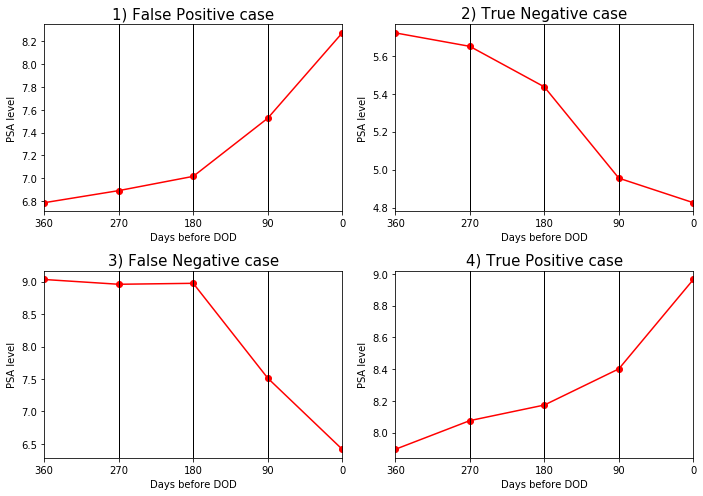

In [79]:
import matplotlib.pyplot as plt

x=np.array([360,270,180,90,0])

fig=plt.figure(figsize=(10,7))

ax1=fig.add_subplot(2,2,1)
ax1.plot(x,testset_benign.loc["FP","PSA360":"PSA0"],'o-r',label="False Positive")
ax1.invert_xaxis()
ax1.set_xticks([360,270,180,90,0])
ax1.set_xlabel('Days before DOD')
ax1.set_ylabel('PSA level')
ax1.axvline(x=270,color='k',linewidth=1)
ax1.axvline(x=180,color='k',linewidth=1)
ax1.axvline(x=90,color='k',linewidth=1)
ax1.set_title('1) False Positive case',fontsize=15)

ax2=fig.add_subplot(2,2,2)
ax2.plot(x,testset_benign.loc["TN","PSA360":"PSA0"],'o-r',label="True Negative")
ax2.invert_xaxis()
ax2.set_xticks([360,270,180,90,0])
ax2.set_xlabel('Days before DOD')
ax2.set_ylabel('PSA level')
ax2.axvline(x=270,color='k',linewidth=1)
ax2.axvline(x=180,color='k',linewidth=1)
ax2.axvline(x=90,color='k',linewidth=1)
ax2.set_title('2) True Negative case',fontsize=15)

ax3=fig.add_subplot(2,2,3)
ax3.plot(x,testset_PCa.loc["FN","PSA360":"PSA0"],'o-r',label="False Negative")
ax3.invert_xaxis()
ax3.set_xticks([360,270,180,90,0])
ax3.set_xlabel('Days before DOD')
ax3.set_ylabel('PSA level')
ax3.axvline(x=270,color='k',linewidth=1)
ax3.axvline(x=180,color='k',linewidth=1)
ax3.axvline(x=90,color='k',linewidth=1)
ax3.set_title('3) False Negative case',fontsize=15)


ax4=fig.add_subplot(2,2,4)
ax4.plot(x,testset_PCa.loc["TP","PSA360":"PSA0"],'o-r',label="True Positive")
ax4.invert_xaxis()
ax4.set_xticks([360,270,180,90,0])
ax4.set_xlabel('Days before DOD')
ax4.set_ylabel('PSA level')
ax4.axvline(x=270,color='k',linewidth=1)
ax4.axvline(x=180,color='k',linewidth=1)
ax4.axvline(x=90,color='k',linewidth=1)
ax4.set_title('4) True Positive case',fontsize=15)

fig.savefig("./output.png",dpi=80)
fig.tight_layout()

fig.show()

KeyError: 'FP'

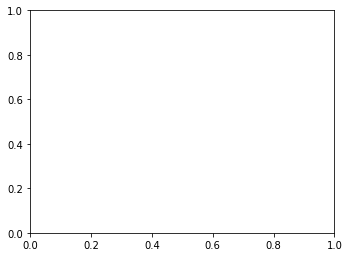

In [87]:
#1개월 단위
import matplotlib.pyplot as plt

x=np.array(range(0,13))

fig=plt.figure(figsize=(12,9))

ax1=fig.add_subplot(2,2,1)
ax1.plot(x,testset_benign.loc["FP","PSA0m":"PSA12m"],'o-r',label="False Positive")
ax1.invert_xaxis()
ax1.set_xticks(np.array(range(12,-1,-1)))
ax1.legend()
ax1.set_xlabel('Days before DOD')
ax1.set_ylabel('PSA level')

ax2=fig.add_subplot(2,2,2)
ax2.plot(x,testset_benign.loc["TN","PSA0m":"PSA12m"],'o-r',label="True Negative")
ax2.invert_xaxis()
ax2.set_xticks(np.array(range(12,-1,-1)))
ax2.legend()
ax2.set_xlabel('Days before DOD')
ax2.set_ylabel('PSA level')

ax3=fig.add_subplot(2,2,3)
ax3.plot(x,testset_PCa.loc["FN","PSA0m":"PSA12m"],'o-r',label="False Negative")
ax3.invert_xaxis()
ax3.set_xticks(np.array(range(12,-1,-1)))
ax3.legend()
ax3.set_xlabel('Days before DOD')
ax3.set_ylabel('PSA level')

ax4=fig.add_subplot(2,2,4)
ax4.plot(x,testset_PCa.loc["TP","PSA0m":"PSA12m"],'o-r',label="True Positive")
ax4.invert_xaxis()
ax4.set_xticks(np.array(range(12,-1,-1)))
ax4.legend()
ax4.set_xlabel('Days before DOD')
ax4.set_ylabel('PSA level')

fig.savefig("./output.png",dpi=150)

fig.show()

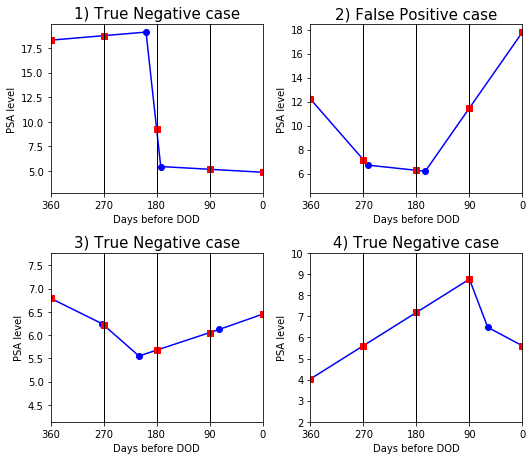

In [93]:
#Figure 1

import matplotlib.pyplot as plt

x=np.array([360,270,180,90,0])

fig=plt.figure(figsize=(7.5,6.5))

ax1=fig.add_subplot(2,2,2)
ax1.plot(testset2.loc[68,"interval1":"interval5"],testset2.loc[68,"PSA1":"PSA5"],'o-b') #FP
ax1.plot(x,testset2.loc[68,"PSA360":"PSA0"],'sr')
ax1.set_xlim([0,360])
ax1.invert_xaxis()
ax1.set_xticks([360,270,180,90,0])
ax1.axvline(x=270,color='k',linewidth=1)
ax1.axvline(x=180,color='k',linewidth=1)
ax1.axvline(x=90,color='k',linewidth=1)
ax1.set_xlabel('Days before DOD')
ax1.set_ylabel('PSA level')
ax1.set_title('2) False Positive case',fontsize=15)

ax2=fig.add_subplot(2,2,3)
ax2.plot(testset2.loc[65,"interval1":"interval9"],testset2.loc[65,"PSA1":"PSA9"],'o-b') #TN
#ax2.plot([testset2.loc[106,"interval4"],0],[testset2.loc[106,"PSA4"],testset2.loc[106,"PSA0"]],'o-b')
ax2.plot([360,testset2.loc[65,"interval1"]],[testset2.loc[65,"PSA360"],testset2.loc[65,"PSA9"]],'o-b')
ax2.plot(x,testset2.loc[65,"PSA360":"PSA0"],'sr')
ax2.set_xlim([0,360])
ax2.invert_xaxis()
ax2.set_xticks([360,270,180,90,0])
ax2.axvline(x=270,color='k',linewidth=1)
ax2.axvline(x=180,color='k',linewidth=1)
ax2.axvline(x=90,color='k',linewidth=1)
ax2.set_xlabel('Days before DOD')
ax2.set_ylabel('PSA level')
ax2.set_title('3) True Negative case',fontsize=15)

ax3=fig.add_subplot(2,2,1)
ax3.plot(testset2.loc[91,"interval1":"interval5"],testset2.loc[91,"PSA1":"PSA5"],'o-b') #TN #91 점차 증가 (5) #91 조금 증가()
ax3.plot(x,testset2.loc[91,"PSA360":"PSA0"],'sr')
ax3.set_xlim([0,360])
ax3.invert_xaxis()
ax3.set_xticks([360,270,180,90,0])
ax3.axvline(x=270,color='k',linewidth=1)
ax3.axvline(x=180,color='k',linewidth=1)
ax3.axvline(x=90,color='k',linewidth=1)
ax3.set_xlabel('Days before DOD')
ax3.set_ylabel('PSA level')
ax3.set_title('1) True Negative case',fontsize=15)

ax4=fig.add_subplot(2,2,4)
ax4.plot(testset2.loc[89,"interval1":"interval10"],testset2.loc[89,"PSA1":"PSA10"],'o-b') 
ax4.plot(x,testset2.loc[89,"PSA360":"PSA0"],'sr')
ax4.set_xlim([0,360])
ax4.set_ylim([2,10])
ax4.invert_xaxis()
ax4.set_xticks([360,270,180,90,0])
ax4.axvline(x=270,color='k',linewidth=1)
ax4.axvline(x=180,color='k',linewidth=1)
ax4.axvline(x=90,color='k',linewidth=1)
ax4.set_xlabel('Days before DOD')
ax4.set_ylabel('PSA level')
ax4.set_title('4) True Negative case',fontsize=15)

fig.tight_layout()
fig.savefig("./output.png",dpi=100)

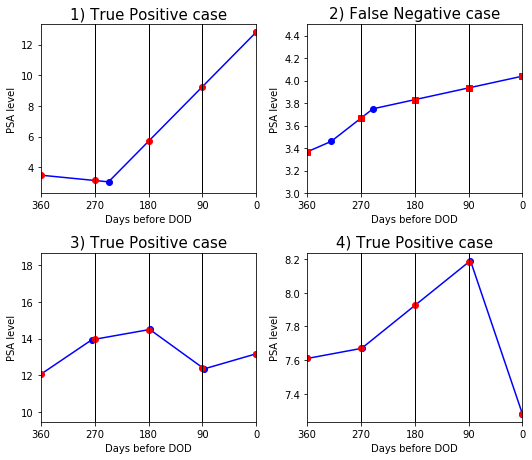

In [126]:
#Figure 2

#https://kongdols-room.tistory.com/86 참고

import matplotlib.pyplot as plt

x=np.array([360,270,180,90,0])

fig=plt.figure(figsize=(7.5,6.5))

ax1=fig.add_subplot(2,2,1)
ax1.plot(testset2.loc[3,"interval1":"interval4"],testset2.loc[3,"PSA1":"PSA4"],'o-b') #TP
ax1.plot(x,testset2.loc[3,"PSA360":"PSA0"],'or')
ax1.set_xlim([0,360])
ax1.invert_xaxis()
ax1.set_xticks([360,270,180,90,0])
ax1.axvline(x=270,color='k',linewidth=1)
ax1.axvline(x=180,color='k',linewidth=1)
ax1.axvline(x=90,color='k',linewidth=1)
ax1.set_xlabel('Days before DOD')
ax1.set_ylabel('PSA level')
ax1.set_title('1) True Positive case',fontsize=15)

#26 감소했다 급증
ax2=fig.add_subplot(2,2,2)
ax2.plot(testset2.loc[155,"interval1":"interval9"],testset2.loc[155,"PSA1":"PSA9"],'o-b')
ax2.plot(x,testset2.loc[155,"PSA360":"PSA0"],'sr')
ax2.set_xlim([0,360])
ax2.set_ylim([3,4.5])
ax2.invert_xaxis()
ax2.set_xticks([360,270,180,90,0])
ax2.axvline(x=270,color='k',linewidth=1)
ax2.axvline(x=180,color='k',linewidth=1)
ax2.axvline(x=90,color='k',linewidth=1)
ax2.set_xlabel('Days before DOD')
ax2.set_ylabel('PSA level')
ax2.set_title('2) False Negative case',fontsize=15)

ax3=fig.add_subplot(2,2,3)
ax3.plot(testset2.loc[8,"interval1":"interval12"],testset2.loc[8,"PSA1":"PSA12"],'o-b') #TP
ax3.plot(x,testset2.loc[8,"PSA360":"PSA0"],'or')
ax3.set_xlim([0,360])
ax3.invert_xaxis()
ax3.set_xticks([360,270,180,90,0])
ax3.axvline(x=270,color='k',linewidth=1)
ax3.axvline(x=180,color='k',linewidth=1)
ax3.axvline(x=90,color='k',linewidth=1)
ax3.set_xlabel('Days before DOD')
ax3.set_ylabel('PSA level')
ax3.set_title('3) True Positive case',fontsize=15)

ax4=fig.add_subplot(2,2,4)
ax4.plot(testset2.loc[27,"interval1":"interval4"],testset2.loc[27,"PSA1":"PSA4"],'o-b') #TP
ax4.plot(x,testset2.loc[27,"PSA360":"PSA0"],'or')
ax4.set_xlim([0,360])
ax4.invert_xaxis()
ax4.set_xticks([360,270,180,90,0])
ax4.axvline(x=270,color='k',linewidth=1)
ax4.axvline(x=180,color='k',linewidth=1)
ax4.axvline(x=90,color='k',linewidth=1)
ax4.set_xlabel('Days before DOD')
ax4.set_ylabel('PSA level')
ax4.set_title('4) True Positive case',fontsize=15)

fig.tight_layout()
fig.savefig("./output.png",dpi=100)

### Table 1~3

In [138]:
data_drop.groupby('event')["final_num"].describe()
data_drop["PSA_average"].describe()

count    1726.000000
mean        5.771113
std         4.075204
min         0.230000
25%         3.255714
50%         4.724167
75%         7.207083
max        42.557500
Name: PSA_average, dtype: float64

In [133]:
from scipy import stats
stats.ttest_ind(data_drop[data_drop['event']==1]["PSA_average"].values,data_drop[data_drop['event']==0]["PSA_average"].values,equal_var = False)

Ttest_indResult(statistic=0.9959404074097448, pvalue=0.3194882589514328)